In [179]:
!pip install yfinance==0.2.4


[notice] A new release of pip is available: 23.1 -> 23.1.1
[notice] To update, run: pip install --upgrade pip


In [180]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import html5lib
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [181]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data.Date, infer_datetime_format=True), y=stock_data.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data.Date, infer_datetime_format=True), y=revenue_data.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

### Question 1: Use yfinance to Extract Stock Data

In [182]:
tesla = yf.Ticker("TSLA")

In [183]:
tesla_data = tesla.history(period="max")

In [184]:
tesla_data.reset_index(inplace=True)
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [185]:
tesla_url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
html_data = requests.get(tesla_url).text

In [186]:
soup = BeautifulSoup(html_data, 'html5lib')

In [187]:
tables=soup.find_all("table")
for index,table in enumerate(tables):
    if("Tesla Quarterly Revenue" in str(table)):
        table_index=index
tesla_revenue=pd.DataFrame(columns=["Date","Revenue"])

for row in tables[table_index].tbody.find_all('tr'):
    col=row.find_all("td")
    if(col!=[]):
        date=col[0].text
        revenue=col[1].text.strip().replace("$","").replace(",","")
        tesla_revenue=tesla_revenue.append({"Date":date,"Revenue":revenue},ignore_index=True)
tesla_revenue.head()

/var/folders/86/t6x4lkqx7vz494b6m6n077qh0000gn/T/ipykernel_46137/1438651430.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/var/folders/86/t6x4lkqx7vz494b6m6n077qh0000gn/T/ipykernel_46137/1438651430.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/var/folders/86/t6x4lkqx7vz494b6m6n077qh0000gn/T/ipykernel_46137/1438651430.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/var/folders/86/t6x4lkqx7vz494b6m6n077qh0000gn/T/ipykernel_46137/1438651430.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/var/folders/86/t6x4lkqx7vz494b6m6n077qh0000gn/T/ipykernel_46137/1438651430.py:12: FutureWarning:

The frame.append method is de

,Date,Revenue
0,2023-03-31,23329
1,2022-12-31,24318
2,2022-09-30,21454
3,2022-06-30,16934
4,2022-03-31,18756


In [188]:
print(tesla_revenue)

tesla_revenue.dropna(inplace=True)
not_empty=tesla_revenue["Revenue"]!=""
tesla_revenue=tesla_revenue[not_empty]

          Date Revenue
0   2023-03-31   23329
1   2022-12-31   24318
2   2022-09-30   21454
3   2022-06-30   16934
4   2022-03-31   18756
5   2021-12-31   17719
6   2021-09-30   13757
7   2021-06-30   11958
8   2021-03-31   10389
9   2020-12-31   10744
10  2020-09-30    8771
11  2020-06-30    6036
12  2020-03-31    5985
13  2019-12-31    7384
14  2019-09-30    6303
15  2019-06-30    6350
16  2019-03-31    4541
17  2018-12-31    7226
18  2018-09-30    6824
19  2018-06-30    4002
20  2018-03-31    3409
21  2017-12-31    3288
22  2017-09-30    2985
23  2017-06-30    2790
24  2017-03-31    2696
25  2016-12-31    2285
26  2016-09-30    2298
27  2016-06-30    1270
28  2016-03-31    1147
29  2015-12-31    1214
30  2015-09-30     937
31  2015-06-30     955
32  2015-03-31     940
33  2014-12-31     957
34  2014-09-30     852
35  2014-06-30     769
36  2014-03-31     621
37  2013-12-31     615
38  2013-09-30     431
39  2013-06-30     405
40  2013-03-31     562
41  2012-12-31     306
42  2012-09

### Question 2: Use Webscraping to Extract Tesla Revenue Data

In [189]:
tesla_revenue.tail()

,Date,Revenue
50,2010-09-30,31
51,2010-06-30,28
52,2010-03-31,21
54,2009-09-30,46
55,2009-06-30,27


### Question 3: Use yfinance to Extract Stock Data

In [190]:
GameStop = yf.Ticker("GME")

In [191]:
GameStop_share_price_data = GameStop.history(period="max")

In [192]:
GameStop_share_price_data.reset_index(inplace=True)
GameStop_share_price_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620129,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712708,1.716074,1.670626,1.683251,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


In [193]:
gme_url="https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue."
html_g_data = requests.get(gme_url).text

In [194]:
soup = BeautifulSoup(html_g_data, 'html5lib')

In [201]:
tables=soup.find_all("table")
for index,table in enumerate(tables):
    if(str(table)=="GameStop Quarterly Revenue"):
        table_index=index

gme_revenue=pd.DataFrame(columns=["Date","Revenue"])

for row in tables[table_index].tbody.find_all("tr"):
    col=row.find_all("td")
    if(col!=[]):
        date=col[0].text
        revenue=col[1].text.replace("$","").replace(",","")
        gme_revenue=gme_revenue.append({"Date":date,"Revenue":revenue},ignore_index=True)
gme_revenue.head()

/var/folders/86/t6x4lkqx7vz494b6m6n077qh0000gn/T/ipykernel_46137/352327399.py:13: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/var/folders/86/t6x4lkqx7vz494b6m6n077qh0000gn/T/ipykernel_46137/352327399.py:13: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/var/folders/86/t6x4lkqx7vz494b6m6n077qh0000gn/T/ipykernel_46137/352327399.py:13: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/var/folders/86/t6x4lkqx7vz494b6m6n077qh0000gn/T/ipykernel_46137/352327399.py:13: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/var/folders/86/t6x4lkqx7vz494b6m6n077qh0000gn/T/ipykernel_46137/352327399.py:13: FutureWarning:

The frame.append method is depreca

,Date,Revenue
0,2023-01-31,2226
1,2022-10-31,1186
2,2022-07-31,1136
3,2022-04-30,1378
4,2022-01-31,2254


### Question 4: Use Webscraping to Extract GME Revenue Data

In [196]:
gme_revenue.tail()

,Date,Revenue
52,2010-01-31,3524
53,2009-10-31,1835
54,2009-07-31,1739
55,2009-04-30,1981
56,2009-01-31,3492


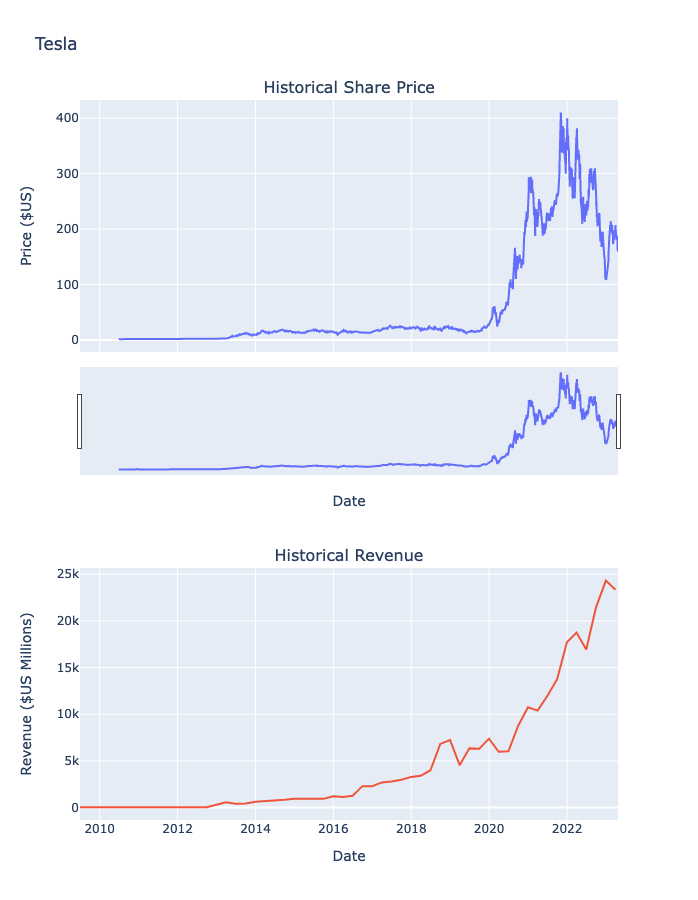

In [197]:
make_graph(tesla_data, tesla_revenue, "Tesla")

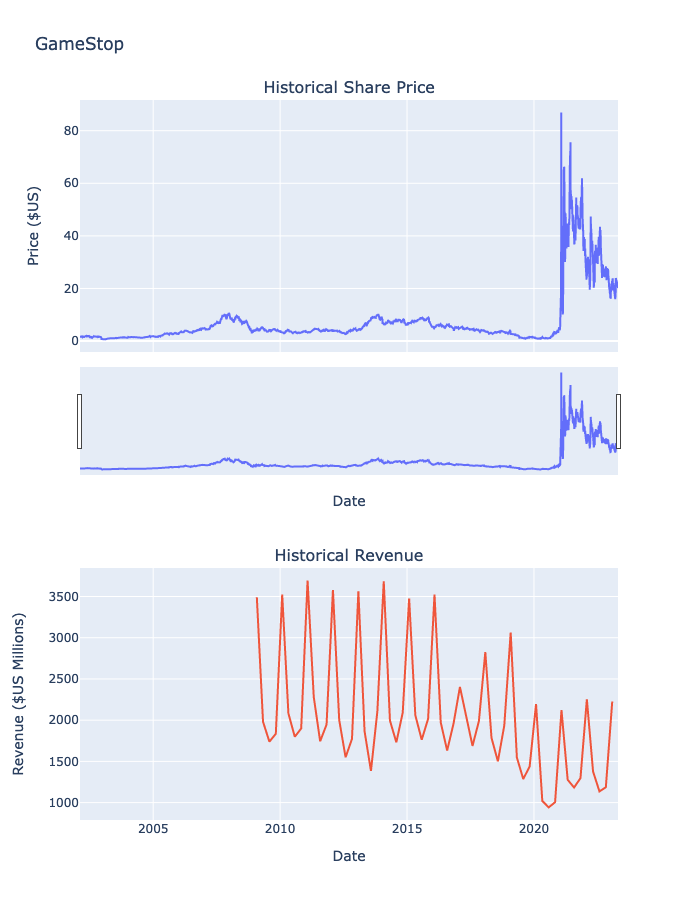

In [199]:
make_graph(GameStop_share_price_data,gme_revenue,'GameStop')